In [5]:
from infrastructure.classes import Experiment, TrainParameters
from infrastructure.training import train
import torch

experiment = Experiment(
    tensor_parameters=dict(dtype=torch.float64, device=torch.device("cpu")),
    dataset_name="banana",
    dataset_number_of_points=1000,
    dataloader_parameters=dict(batch_size=256, shuffle=True),
    pushforward_operator_name="epsilon_augmented_entropic_optimal_transport_quantile_regression",
    pushforward_operator_parameters=dict(
        feature_dimension=1,
        response_dimension=2,
        hidden_dimension=4,
        number_of_hidden_layers=8,
        number_of_samples_for_entropy_dual_estimation=512,
        activation_function_name="Softplus"
    ),
    train_parameters=TrainParameters(
        number_of_epochs_to_train=1000,
        verbose=True,
        optimizer_parameters=dict(lr=0.01),
        scheduler_parameters=dict(eta_min=0)
    )
)

model = train(experiment)
_ = model.eval()

Epoch: 1000, Objective: 0.849, LR: 0.000000: 100%|██████████| 1000/1000 [03:57<00:00,  4.22it/s]


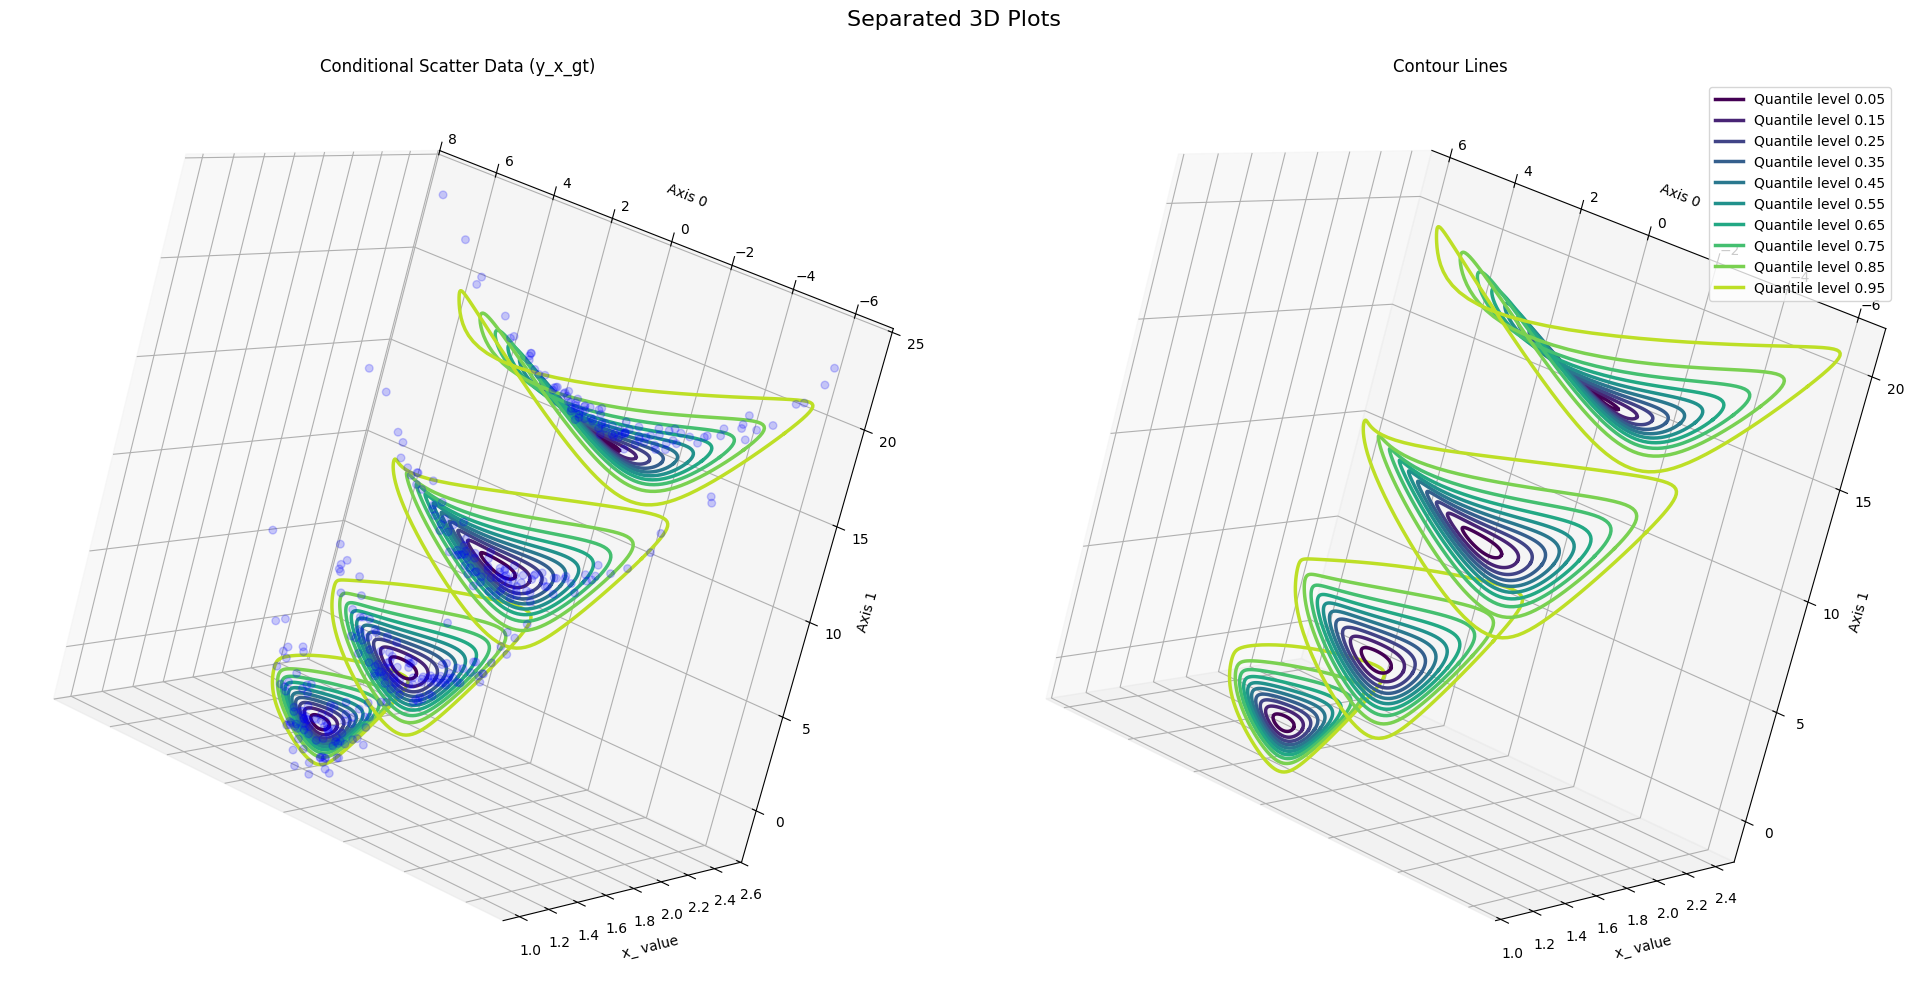

In [6]:
%matplotlib inline
from utils.plot import plot_potentials_from_banana_dataset

plot_potentials_from_banana_dataset(
    model=model,
    number_of_conditional_points=4,
    number_of_points_to_sample=100,
    tensor_parameters=experiment.tensor_parameters
)

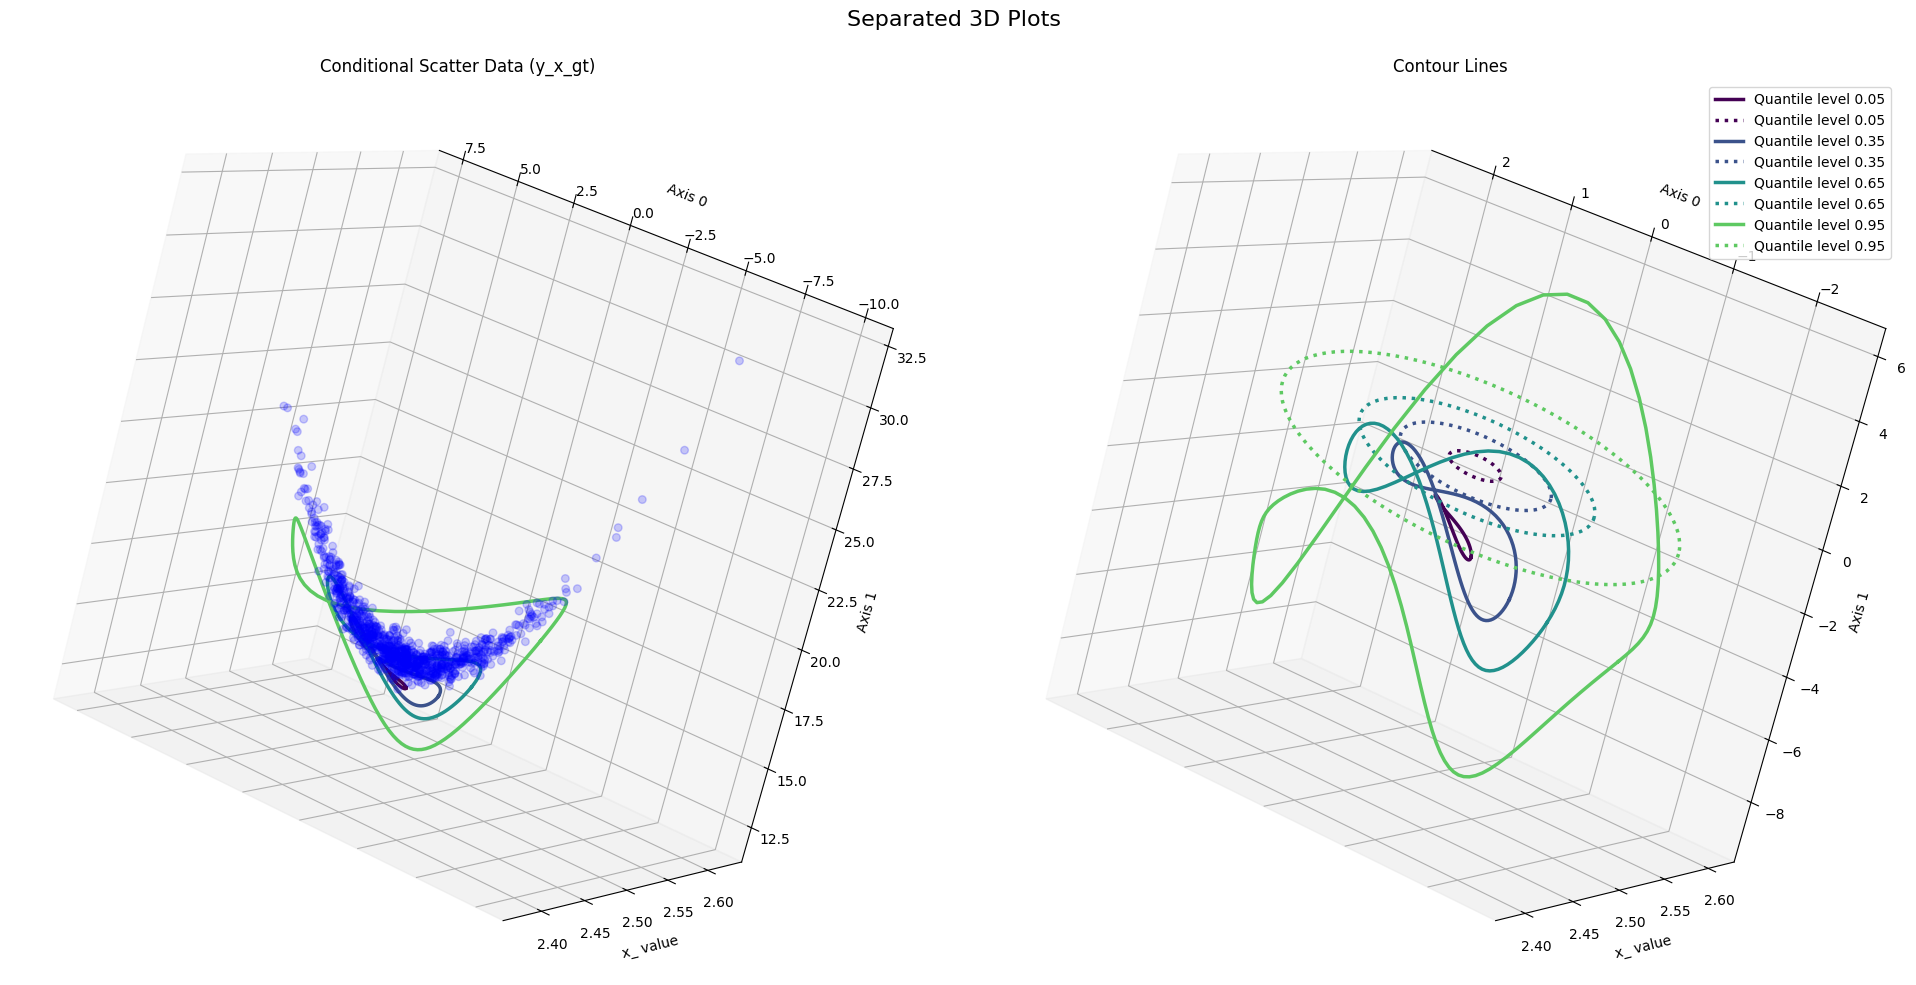

In [8]:
%matplotlib inline
from utils.plot import plot_quantile_levels_from_banana_dataset

plot_quantile_levels_from_banana_dataset(
    model=model,
    number_of_points_to_sample=1000,
    tensor_parameters=experiment.tensor_parameters,
    conditional_value=2.5,
    number_of_quantile_levels=4
)